### Wstęp do Uczenia Maszynowego 
##### Laboratorium 3

### 1. Kroswalidacja (*ang. cross validation*)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

https://scikit-learn.org/stable/modules/cross_validation.html

### Zadanie 1
---------
Wymień zalety i wady kroswalidacji.


Zalety:
- dobrze działa w praktyce
- używamy wszystkich danych jako zbiór treningowy i testowy

Wady:
- zbiór treningowy i testowy nie są niezależne 
- możemy policzyć odchylenie standardowe, ale nie ma gwarancji na nie
- błąd jest obarczony błędem (bias) - próbki treningowe są mniejsze niż pełny zbiór
- wydłużenie czasu budowy, k razy trzeba trenowac modele

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
pima = pd.read_csv("../lab2/pima.csv")


In [3]:
y = pima.Outcome
X = pima.drop(["Outcome"], axis = 1)

#### Zadanie 2
--------
Używając funkcji `cross_val_score()` oszacuj wartość średnią oraz odchylenie standardowe 10-krotnej kroswalidacji dla modelu drzewa.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
Tree = tree.DecisionTreeClassifier()
scores = cross_val_score(Tree, X_train, y_train, cv = 10)



In [14]:
scores

array([0.74074074, 0.64814815, 0.74074074, 0.75925926, 0.64814815,
       0.75925926, 0.74074074, 0.71698113, 0.69811321, 0.67924528])

In [15]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.04


### Zadanie 3
--------------------
Jaki jest stosunek obserwacji klasy 1 do klasy 0? Czy to powinno nas martwić? Czy możemy coś zrobić?

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

### Zadanie 4
---------
Przeprowadź na zbiorze danych `pima.csv` 100 razy 10-krotną kroswalidację i przestaw otrzymane wyniki (miara `roc_auc`) - średnią oraz odchylenie standardowe. Narysuj rozkład otrzymanych wyników.



In [16]:
Tree = tree.DecisionTreeClassifier()
scores_all = []
for i in range(0, 100):
    scores = cross_val_score(Tree, X_train, y_train, cv = 10, scoring = 'roc_auc')
    scores_all.append(scores)


In [17]:
df = pd.DataFrame(scores_all)

<Axes: >

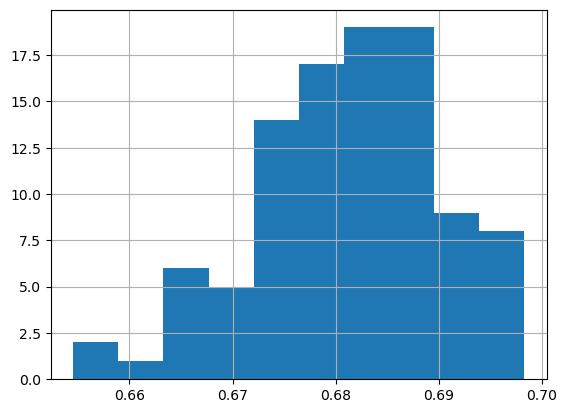

In [18]:
df.aggregate(["mean", "std"], axis=1)["mean"].hist()

<Axes: >

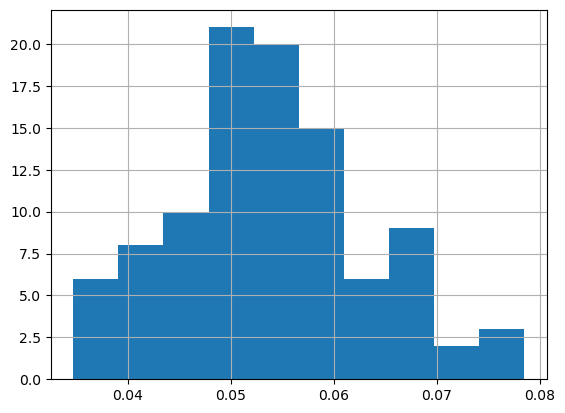

In [19]:
df.aggregate(["mean", "std"], axis=1)["std"].hist()

### 2. Krzywa ROC

Jak się wylicza krzywą ROC?

### Zadanie 5
---------
Przygotuj model do oceny metodą `roc_auc`.


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [20]:
Tree1 = tree.DecisionTreeClassifier()
Tree2 = tree.DecisionTreeClassifier(max_depth=3)
Tree3 = tree.DecisionTreeClassifier(max_leaf_nodes=5)

In [22]:
Tree1 = Tree1.fit(X_train, y_train)
Tree2 = Tree2.fit(X_train, y_train)
Tree3 = Tree3.fit(X_train, y_train)

In [25]:
pred1 = Tree1.predict_proba(X_test)
pred2 = Tree2.predict_proba(X_test)
pred3 = Tree3.predict_proba(X_test)

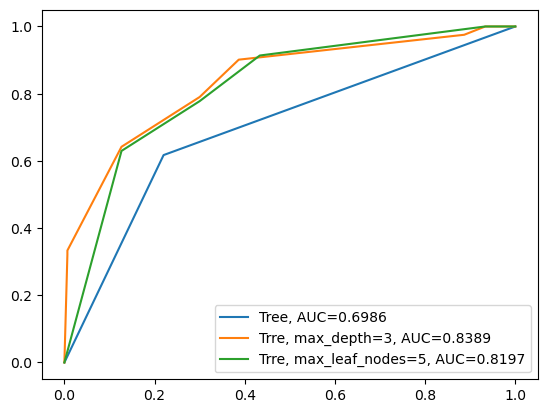

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, pred1[:,1])
plt.plot(fpr,tpr,label="Tree, AUC="+str(round(roc_auc_score(y_test, pred1[:,1]), 4)))
fpr, tpr, thresholds = roc_curve(y_test, pred2[:,1])
plt.plot(fpr,tpr,label="Trre, max_depth=3, AUC="+str(round(roc_auc_score(y_test, pred2[:,1]), 4)))
fpr, tpr, thresholds = roc_curve(y_test, pred3[:,1])
plt.plot(fpr,tpr,label="Trre, max_leaf_nodes=5, AUC="+str(round(roc_auc_score(y_test, pred3[:,1]), 4)))
plt.legend()

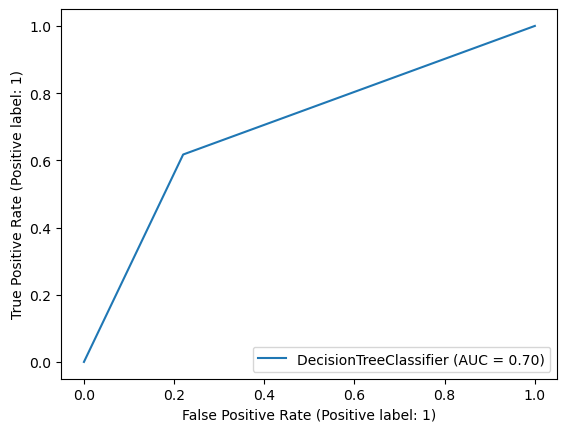

In [50]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(Tree1, X_test, y_test)

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, Tree1.predict_proba(X_test)[:, 1])

0.698641975308642

### 4. Podsumowanie, czyli co warto wiedzieć...

1. Jak definiujemy problem klasyfikacji?
2. Podział zbioru na treningowy, walidacyjny i testowy.
2. Miary dokładności klasyfikatorów:

    a) macierz pomyłek (*ang. confusion matrix*),

    b) dokładność, czułość, precyzja, (*ang. accuracy, recall, precision*)

    c) krzywa ROC,

    d) AUC.


3. Kroswalidacja (*ang. cross validation*)
4. Drzewa decyzyjne:

    a) wady i zalety,

    b) jak budujemy drzewo,

    b) jakie mamy miary podziału,
    
    d) przycinanie drzew.